In [1]:
import numpy as np
from astropy.io import fits
import astroquery
from astroquery.mast import TesscutClass
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Periódicas crecientes
PC1 = 'TIC 457250322'
PC2 = 'TIC 427450306'
PC3 = 'TIC 388935535'
PC4 = 'TIC 427333924'
PC5 = 'TIC 427374400'

#Periódicas decrecientes
PD1 = 'TIC 11198070'
PD2 = 'TIC 24722806'
PD3 = 'TIC 50623180'
PD4 = 'TIC 71727226'
PD5 = 'TIC 427352910'

In [3]:
#Funciones

#Importa los datos existentes de una estrella por medio de Tesscut
def findStar(star):
    starName = star
    hdulist = TesscutClass().get_cutouts(objectname = starName, size = 10)
    hdu = hdulist[0]
    return hdu

#Grafica una de las imágenes tomadas de una de las estrellas
def plot_cutout(image):
    return plt.imshow(image, origin = 'lower', cmap = plt.cm.YlGnBu_r, vmax = np.percentile(image, 95), vmin = np.percentile(image, 5))

#Identifica las secciones de la imagen que se tomarán como cielo
def cielo (star):
    
    sky = np.array([])
    
    for tmp in findStar(star)[1].data['FLUX']:
        
        thr = np.quantile(tmp.ravel(), 0.25)
        tmp[tmp > thr] = np.nan
        sky = np.append(sky, np.nanmean(tmp))
        
    return sky

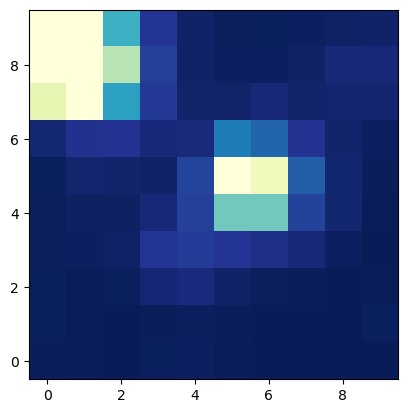

In [4]:
plot_cutout(findStar(PC1)[1].data['FLUX'][1])

In [5]:
tmp = findStar(PC1)[1].data['FLUX'][1]
thr = np.quantile(findStar(PC1)[1].data['FLUX'][1].ravel(), 0.25)
tmp[tmp > thr] = np.nan
np.nanmean(tmp)

128.63284

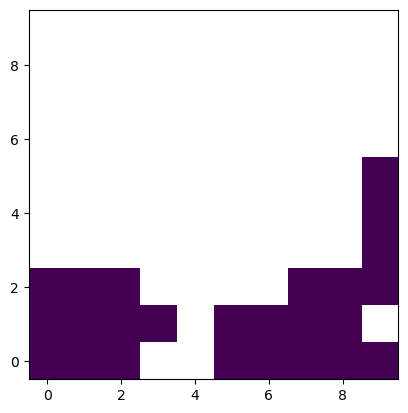

In [6]:
min_v = tmp.min()
max_v = tmp.max()
plt.imshow(tmp,origin="lower",vmin=min_v,vmax=max_v)

In [7]:
#Otra forma de importar los datos de las estrellas escogidas
with fits.open(f"./{PC1}/tess-s0006-1-1_81.878737_2.599600_10x10_astrocut.fits") as hdu:
    dataPC1_30 = hdu[1].data
    
with fits.open(f"./{PC1}/tess-s0032-1-2_81.878737_2.599600_10x10_astrocut.fits") as hdu:
    dataPC1_2 = hdu[1].data
    
with fits.open(f"./{PC2}/tess-s0006-1-1_84.088001_-0.287558_10x10_astrocut.fits") as hdu:
    dataPC2_30 = hdu[1].data
    
with fits.open(f"./{PC2}/tess-s0032-1-2_84.088001_-0.287558_10x10_astrocut.fits") as hdu:
    dataPC2_2 = hdu[1].data
    
with fits.open(f"./{PC3}/tess-s0006-1-1_84.194572_-6.122853_10x10_astrocut.fits") as hdu:
    dataPC3_30 = hdu[1].data
    
with fits.open(f"./{PC4}/tess-s0006-1-1_83.512172_-5.828970_10x10_astrocut.fits") as hdu:
    dataPC4_30 = hdu[1].data
    
with fits.open(f"./{PC4}/tess-s0032-1-2_83.512172_-5.828970_10x10_astrocut.fits") as hdu:
    dataPC4_2 = hdu[1].data
    
with fits.open(f"./{PC5}/tess-s0006-1-1_83.763932_-4.945284_10x10_astrocut.fits") as hdu:
    dataPC5_30 = hdu[1].data
    
with fits.open(f"./{PC5}/tess-s0032-1-2_83.763932_-4.945284_10x10_astrocut.fits") as hdu:
    dataPC5_2 = hdu[1].data
    
with fits.open(f"./{PD1}/tess-s0006-1-1_84.425966_-0.113378_10x10_astrocut.fits") as hdu:
    dataPD1_30 = hdu[1].data
    
with fits.open(f"./{PD1}/tess-s0032-1-2_84.425966_-0.113378_10x10_astrocut.fits") as hdu:
    dataPD1_2 = hdu[1].data
    
with fits.open(f"./{PD2}/tess-s0006-2-4_81.471461_-6.934781_10x10_astrocut.fits") as hdu:
    dataPD2_30 = hdu[1].data
    
with fits.open(f"./{PD2}/tess-s0032-2-3_81.471461_-6.934781_10x10_astrocut.fits") as hdu:
    dataPD2_2 = hdu[1].data
    
with fits.open(f"./{PD3}/tess-s0006-1-1_82.338223_-4.541771_10x10_astrocut.fits") as hdu:
    dataPD3_30 = hdu[1].data
    
with fits.open(f"./{PD3}/tess-s0032-1-2_82.338223_-4.541771_10x10_astrocut.fits") as hdu:
    dataPD3_2 = hdu[1].data
    
with fits.open(f"./{PD4}/tess-s0006-1-1_91.089670_-5.917237_10x10_astrocut.fits") as hdu:
    dataPD4_30 = hdu[1].data
    
with fits.open(f"./{PD4}/tess-s0033-1-1_91.089670_-5.917237_10x10_astrocut.fits") as hdu:
    dataPD4_2 = hdu[1].data
    
with fits.open(f"./{PD5}/tess-s0006-1-1_83.641441_-5.473473_10x10_astrocut.fits") as hdu:
    dataPD5_30 = hdu[1].data
    
with fits.open(f"./{PD5}/tess-s0032-1-2_83.641441_-5.473473_10x10_astrocut.fits") as hdu:
    dataPD5_2 = hdu[1].data

In [8]:
#Nueva función de cielo
def cielo (data):
    
    sky = np.array([])
    
    for tmp in np.copy(data['FLUX']):
        
        thr = np.quantile(tmp.ravel(), 0.25)
        tmp[tmp > thr] = np.nan
        sky = np.append(sky, np.nanmean(tmp))
        
    return sky

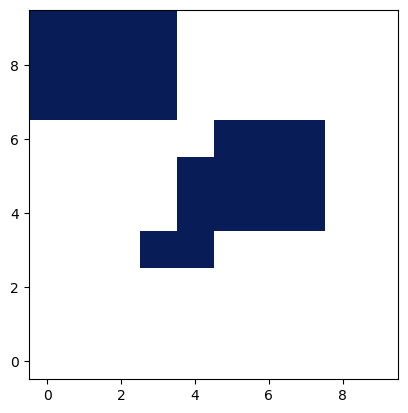

In [9]:
tmp = dataPC1_30['FLUX'][5]
thr = np.quantile(dataPC1_30['FLUX'][5].ravel(), 0.75)
tmp[tmp < thr] = np.nan
plt.imshow(tmp, origin = 'lower', cmap = plt.cm.YlGnBu_r, vmax = np.percentile(tmp, 95), vmin = np.percentile(tmp, 5))

In [10]:
#Cielo de cada estrella
skyPC1_30 = cielo(dataPC1_30)
skyPC1_2 = cielo(dataPC1_2)
skyPC2_30 = cielo(dataPC2_30)
skyPC2_2 = cielo(dataPC2_2)
skyPC3_30 = cielo(dataPC3_30)
skyPC4_30 = cielo(dataPC4_30)
skyPC4_2 = cielo(dataPC4_2)
skyPC5_30 = cielo(dataPC5_30)
skyPC5_2 = cielo(dataPC5_2)

skyPD1_30 = cielo(dataPD1_30)
skyPD1_2 = cielo(dataPD1_2)
skyPD2_30 = cielo(dataPD2_30)
skyPD2_2 = cielo(dataPD2_2)
skyPD3_30 = cielo(dataPD3_30)
skyPD3_2 = cielo(dataPD3_2)
skyPD4_30 = cielo(dataPD4_30)
skyPD4_2 = cielo(dataPD4_2)
skyPD5_30 = cielo(dataPD5_30)
skyPD5_2 = cielo(dataPD5_2)

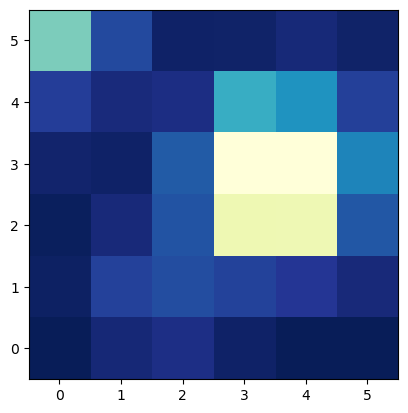

In [11]:
new = [dataPC1_30['FLUX'][1][2:8][0][2:8].tolist(), dataPC1_30['FLUX'][1][2:8][1][2:8].tolist(), dataPC1_30['FLUX'][1][2:8][2][2:8].tolist(), dataPC1_30['FLUX'][1][2:8][3][2:8].tolist(), dataPC1_30['FLUX'][1][2:8][4][2:8].tolist(), dataPC1_30['FLUX'][1][2:8][5][2:8].tolist()]
nnew = np.array(new)
plt.imshow(nnew, origin = 'lower', cmap = plt.cm.YlGnBu_r, vmax = np.percentile(nnew, 95), vmin = np.percentile(nnew, 5))

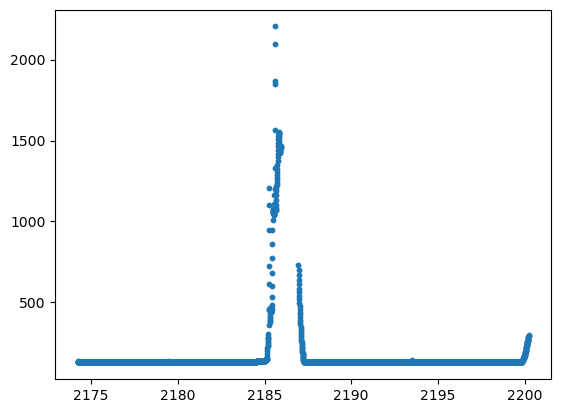

In [12]:
plt.scatter(dataPD1_2['TIME'], skyPD1_2, s=10)

In [13]:
dataPC1_30['FLUX'][0]

array([[ 130.69746 ,  129.64291 ,  127.81414 ,  134.11714 ,  137.23293 ,
         129.36954 ,  124.17917 ,  123.2374  ,  123.3246  ,  127.07456 ],
       [ 133.12898 ,  127.784004,  127.821815,  130.74571 ,  135.07515 ,
         131.72162 ,  126.24369 ,  125.16492 ,  125.6428  ,  133.61877 ],
       [ 133.16566 ,  130.06375 ,  132.50647 ,  155.75342 ,  167.4979  ,
         145.26042 ,  135.45692 ,  130.5138  ,  128.12692 ,  129.1732  ],
       [ 134.14531 ,  136.25516 ,  143.18085 ,  189.77808 ,  200.79561 ,
         190.63603 ,  177.69841 ,  158.26834 ,  137.17166 ,  126.54321 ],
       [ 135.216   ,  138.76167 ,  138.88531 ,  159.54242 ,  207.93889 ,
         423.20392 ,  423.37442 ,  211.38623 ,  152.18465 ,  129.46242 ],
       [ 134.94037 ,  150.4452  ,  149.02486 ,  144.45586 ,  214.91132 ,
         621.03766 ,  576.8564  ,  247.88681 ,  153.15634 ,  131.5001  ],
       [ 154.03204 ,  184.77257 ,  184.72296 ,  160.08168 ,  164.86725 ,
         287.8946  ,  261.25174 ,  189.06863 

In [14]:
#Lo que se tomará como estrella, la parte central de la imagen 6x6 pixeles
def estrellas (data):
    
    n = len(data['FLUX'])
    nc = np.empty(n, dtype = object)
    est = np.zeros(n)

    for i in range(n):
        est[i] = np.sum(data['FLUX'][i][2:8 , 2:8])
    
    return est

In [15]:
dataPC1_30['FLUX'][0][2:8 , 2:8]

array([[132.50647, 155.75342, 167.4979 , 145.26042, 135.45692, 130.5138 ],
       [143.18085, 189.77808, 200.79561, 190.63603, 177.69841, 158.26834],
       [138.88531, 159.54242, 207.93889, 423.20392, 423.37442, 211.38623],
       [149.02486, 144.45586, 214.91132, 621.03766, 576.8564 , 247.88681],
       [184.72296, 160.08168, 164.86725, 287.8946 , 261.25174, 189.06863],
       [338.43182, 197.34631, 146.07103, 146.61296, 157.81725, 147.50307]],
      dtype=float32)

In [16]:
stPC1_30 = estrellas(dataPC1_30)
stPC1_2 = estrellas(dataPC1_2)
stPC2_30 = estrellas(dataPC2_30)
stPC2_2 = estrellas(dataPC2_2)
stPC3_30 = estrellas(dataPC3_30)
stPC4_30 = estrellas(dataPC4_30)
stPC4_2 = estrellas(dataPC4_2)
stPC5_30 = estrellas(dataPC5_30)
stPC5_2 = estrellas(dataPC5_2)

stPD1_30 = estrellas(dataPD1_30)
stPD1_2 = estrellas(dataPD1_2)
stPD2_30 = estrellas(dataPD2_30)
stPD2_2 = estrellas(dataPD2_2)
stPD3_30 = estrellas(dataPD3_30)
stPD3_2 = estrellas(dataPD3_2)
stPD4_30 = estrellas(dataPD4_30)
stPD4_2 = estrellas(dataPD4_2)
stPD5_30 = estrellas(dataPD5_30)
stPD5_2 = estrellas(dataPD5_2)

In [17]:
phPC1_30 = stPC1_30 - skyPC1_30*36
phPC1_2 = stPC1_2 - skyPC1_2*36
phPC2_30 = stPC2_30 - skyPC2_30*36
phPC2_2 = stPC2_2 - skyPC2_2*36
phPC3_30 = stPC3_30 - skyPC3_30*36
phPC4_30 = stPC4_30 - skyPC4_30*36
phPC4_2 = stPC4_2 - skyPC4_2*36
phPC5_30 = stPC5_30 - skyPC5_30*36
phPC5_2 = stPC5_2 - skyPC5_2*36

phPD1_30 = stPD1_30 - skyPD1_30*36
phPD1_2 = stPD1_2 - skyPD1_2*36
phPD2_30 = stPD2_30 - skyPD2_30*36
phPD2_2 = stPD2_2 - skyPD2_2*36
phPD3_30 = stPD3_30 - skyPD3_30*36
phPD3_2 = stPD3_2 - skyPD3_2*36
phPD4_30 = stPD4_30 - skyPD4_30*36
phPD4_2 = stPD4_2 - skyPD4_2*36
phPD5_30 = stPD5_30 - skyPD5_30*36
phPD5_2 = stPD5_2 - skyPD5_2*36

In [18]:
#Puntos atípicos en los datos, fechas
puntos_1 = [5, 154, 303, 569, 718, 867]
puntos_2 = [0, 756, 2626]

127.48535919189453
7297.50927734375


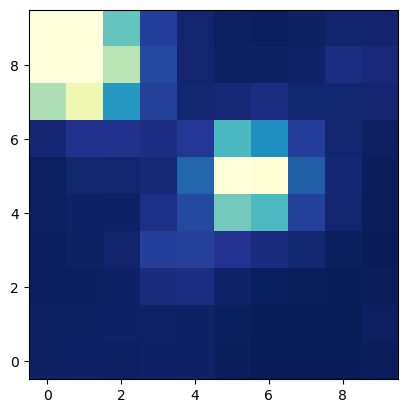

In [19]:
plot_cutout(dataPC1_30['FLUX'][872])
print(skyPC1_30[872])
print(stPC1_30[872])

127.19601440429688
7759.033203125


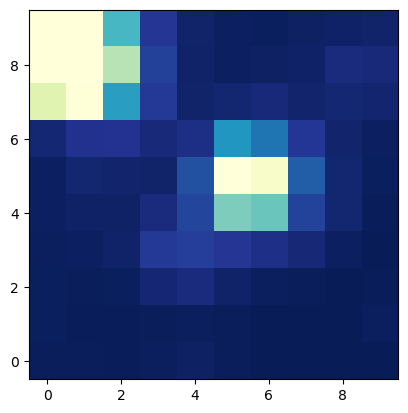

In [20]:
plot_cutout(dataPC1_30['FLUX'][300])
print(skyPC1_30[300])
print(stPC1_30[300])

In [21]:
timePC1_30 = dataPC1_30['TIME'].tolist()
phPC1_30 = phPC1_30.tolist()

for i in puntos_1:
    timePC1_30.pop(i)
    phPC1_30.pop(i) 

timePC1_30 = np.array(timePC1_30)
phPC1_30 = -2.5*np.log(np.array(phPC1_30)) + 25

In [22]:
timePC1_2 = dataPC1_2['TIME'].tolist()
phPC1_2 = phPC1_2.tolist()

for i in puntos_2:
    timePC1_2.pop(i)
    phPC1_2.pop(i) 

timePC1_2 = np.array(timePC1_2)
phPC1_2 = -2.5*np.log(np.array(phPC1_2)) + 25

In [23]:
timePC2_30 = dataPC2_30['TIME'].tolist()
phPC2_30 = phPC2_30.tolist()

for i in puntos_1:
    timePC2_30.pop(i)
    phPC2_30.pop(i) 

timePC2_30 = np.array(timePC2_30)
phPC2_30 = -2.5*np.log(np.array(phPC2_30)) + 25

timePC2_2 = dataPC2_2['TIME'].tolist()
phPC2_2 = phPC2_2.tolist()

for i in puntos_2:
    timePC2_2.pop(i)
    phPC2_2.pop(i) 

timePC2_2 = np.array(timePC2_2)
phPC2_2 = -2.5*np.log(np.array(phPC2_2)) + 25

In [24]:
timePC3_30 = dataPC3_30['TIME'].tolist()
phPC3_30 = phPC3_30.tolist()

for i in puntos_1:
    timePC3_30.pop(i)
    phPC3_30.pop(i) 

timePC3_30 = np.array(timePC3_30)
phPC3_30 = -2.5*np.log(np.array(phPC3_30)) + 25

In [25]:
timePC4_30 = dataPC4_30['TIME'].tolist()
phPC4_30 = phPC4_30.tolist()

for i in puntos_1:
    timePC4_30.pop(i)
    phPC4_30.pop(i) 

timePC4_30 = np.array(timePC4_30)
phPC4_30 = -2.5*np.log(np.array(phPC4_30)) + 25

timePC4_2 = dataPC4_2['TIME'].tolist()
phPC4_2 = phPC4_2.tolist()

for i in puntos_2:
    timePC4_2.pop(i)
    phPC4_2.pop(i) 

timePC4_2 = np.array(timePC4_2)
phPC4_2 = -2.5*np.log(np.array(phPC4_2)) + 25

In [26]:
timePC5_30 = dataPC5_30['TIME'].tolist()
phPC5_30 = phPC5_30.tolist()

for i in puntos_1:
    timePC5_30.pop(i)
    phPC5_30.pop(i) 

timePC5_30 = np.array(timePC5_30)
phPC5_30 = -2.5*np.log(np.array(phPC5_30)) + 25

timePC5_2 = dataPC5_2['TIME'].tolist()
phPC5_2 = phPC5_2.tolist()

for i in puntos_2:
    timePC5_2.pop(i)
    phPC5_2.pop(i) 

timePC5_2 = np.array(timePC5_2)
phPC5_2 = -2.5*np.log(np.array(phPC5_2)) + 25

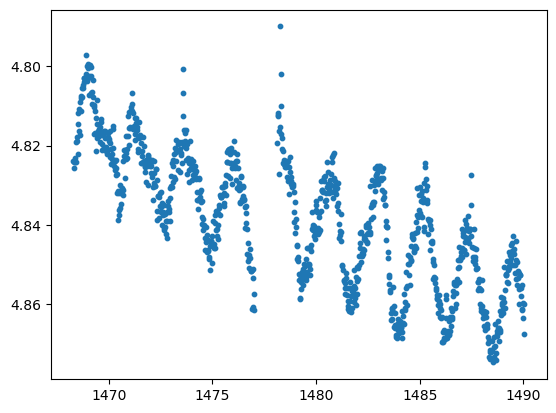

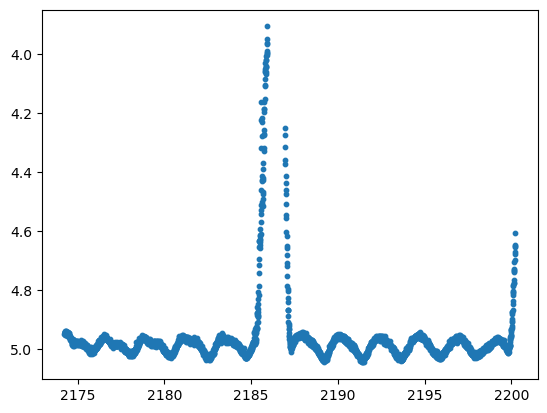

In [27]:
#Periodos resultantes
plt.figure()
plt.scatter(timePC1_30, phPC1_30, s=10)
#plt.ylim(350, 380)
plt.gca().invert_yaxis()

plt.figure()
plt.scatter(timePC1_2, phPC1_2, s=10)
#plt.ylim(13.8, 14.1)
plt.gca().invert_yaxis()

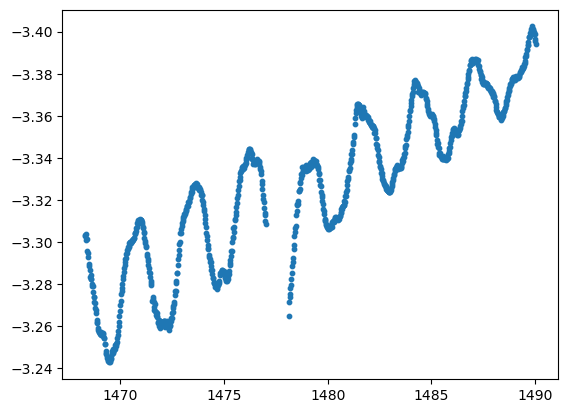

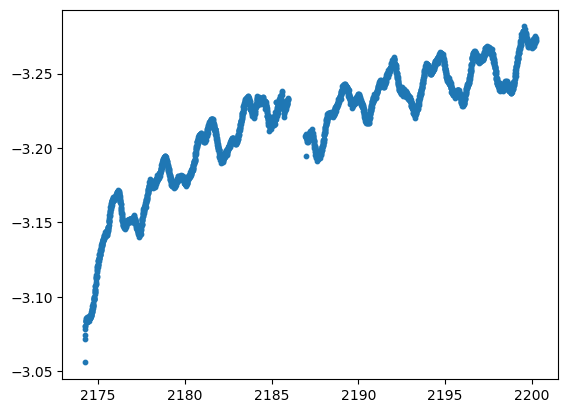

In [28]:
plt.figure()
plt.scatter(timePC2_30, phPC2_30, s=10)
#plt.ylim(3700, 3900)
plt.gca().invert_yaxis()

plt.figure()
plt.scatter(timePC2_2, phPC2_2, s=10)
#plt.ylim(3600, 3800)
plt.gca().invert_yaxis()

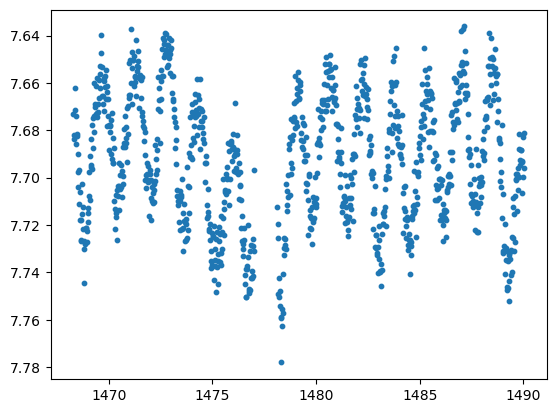

In [29]:
plt.figure()
plt.scatter(timePC3_30, phPC3_30, s=10)
#plt.ylim(43, 48)
plt.gca().invert_yaxis()

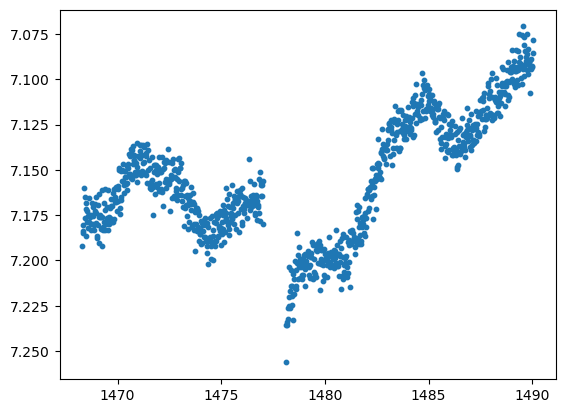

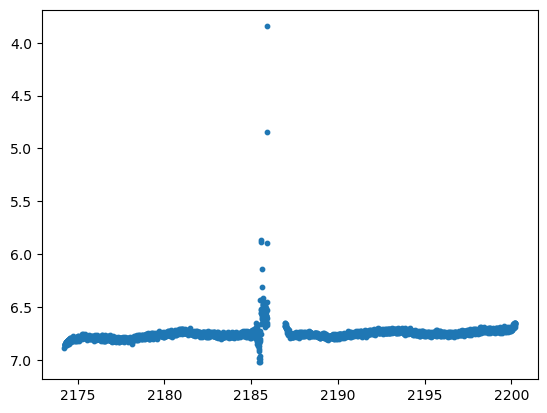

In [30]:
plt.figure()
plt.scatter(timePC4_30, phPC4_30, s=10)
#plt.ylim(68, 73)
plt.gca().invert_yaxis()

plt.figure()
plt.scatter(timePC4_2, phPC4_2, s=10)
#plt.ylim(70, 90)
plt.gca().invert_yaxis()

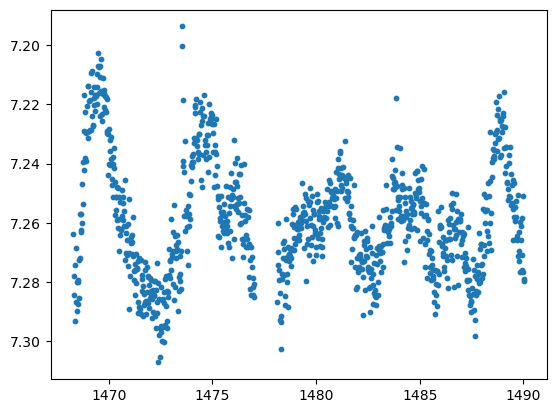

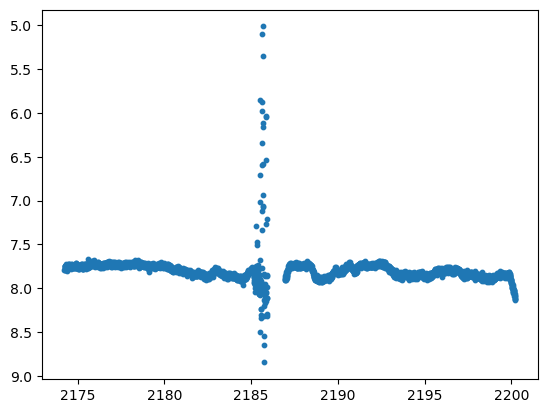

In [31]:
plt.figure()
plt.scatter(timePC5_30, phPC5_30, s=10)
#plt.ylim(62, 68)
plt.gca().invert_yaxis()

plt.figure()
plt.scatter(timePC5_2, phPC5_2, s=10)
#plt.ylim(50, 68)
plt.gca().invert_yaxis()

In [32]:
timePD1_30 = dataPD1_30['TIME'].tolist()
phPD1_30 = phPD1_30.tolist()

for i in puntos_1:
    timePD1_30.pop(i)
    phPD1_30.pop(i) 

timePD1_30 = np.array(timePD1_30)
phPD1_30 = -2.5*np.log(np.array(phPD1_30)) + 34

timePD1_2 = dataPD1_2['TIME'].tolist()
phPD1_2 = phPD1_2.tolist()

for i in puntos_2:
    timePD1_2.pop(i)
    phPD1_2.pop(i) 

timePD1_2 = np.array(timePD1_2)
phPD1_2 = -2.5*np.log(np.array(phPD1_2)) + 25

timePD2_30 = dataPD2_30['TIME'].tolist()
phPD2_30 = phPD2_30.tolist()

for i in puntos_1:
    timePD2_30.pop(i)
    phPD2_30.pop(i) 

timePD2_30 = np.array(timePD2_30)
phPD2_30 = -2.5*np.log(np.array(phPD2_30)) + 25

timePD2_2 = dataPD2_2['TIME'].tolist()
phPD2_2 = phPD2_2.tolist()

for i in puntos_2:
    timePD2_2.pop(i)
    phPD2_2.pop(i) 

timePD2_2 = np.array(timePD2_2)
phPD2_2 = -2.5*np.log(np.array(phPD2_2)) + 25

timePD3_30 = dataPD3_30['TIME'].tolist()
phPD3_30 = phPD3_30.tolist()

for i in puntos_1:
    timePD3_30.pop(i)
    phPD3_30.pop(i) 

timePD3_30 = np.array(timePD3_30)
phPD3_30 = -2.5*np.log(np.array(phPD3_30)) + 25

timePD3_2 = dataPD3_2['TIME'].tolist()
phPD3_2 = phPD3_2.tolist()

for i in puntos_2:
    timePD3_2.pop(i)
    phPD3_2.pop(i) 

timePD3_2 = np.array(timePD3_2)
phPD3_2 = -2.5*np.log(np.array(phPD3_2)) + 25

timePD4_30 = dataPD4_30['TIME'].tolist()
phPD4_30 = phPD4_30.tolist()

for i in puntos_1:
    timePD4_30.pop(i)
    phPD4_30.pop(i) 

timePD4_30 = np.array(timePD4_30)
phPD4_30 = -2.5*np.log(np.array(phPD4_30)) + 25

timePD4_2 = dataPD4_2['TIME'].tolist()
phPD4_2 = phPD4_2.tolist()

for i in puntos_2:
    timePD4_2.pop(i)
    phPD4_2.pop(i) 

timePD4_2 = np.array(timePD4_2)
phPD4_2 = -2.5*np.log(np.array(phPD4_2)) + 25

timePD5_30 = dataPD5_30['TIME'].tolist()
phPD5_30 = phPD5_30.tolist()

for i in puntos_1:
    timePD5_30.pop(i)
    phPD5_30.pop(i) 

timePD5_30 = np.array(timePD5_30)
phPD5_30 = -2.5*np.log(np.array(phPD5_30)) + 25

timePD5_2 = dataPD5_2['TIME'].tolist()
phPD5_2 = phPD5_2.tolist()

for i in puntos_2:
    timePD5_2.pop(i)
    phPD5_2.pop(i) 

timePD5_2 = np.array(timePD5_2)
phPD5_2 = -2.5*np.log(np.array(phPD5_2)) + 25

/tmp/ipykernel_18321/2355501830.py:29: RuntimeWarning: divide by zero encountered in log
  phPD2_30 = -2.5*np.log(np.array(phPD2_30)) + 25


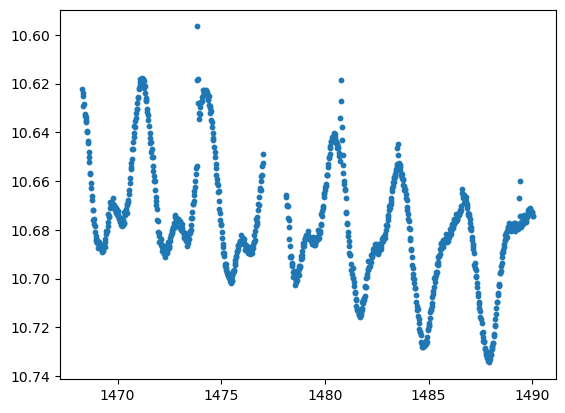

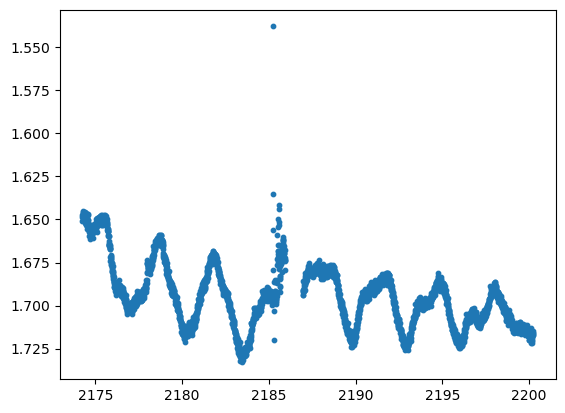

In [33]:
plt.figure()
plt.scatter(timePD1_30, phPD1_30, s=10)
#plt.ylim(475, 500)
plt.gca().invert_yaxis()

plt.figure()
plt.scatter(timePD1_2, phPD1_2, s=10)
#plt.ylim(460, 490)
plt.gca().invert_yaxis()

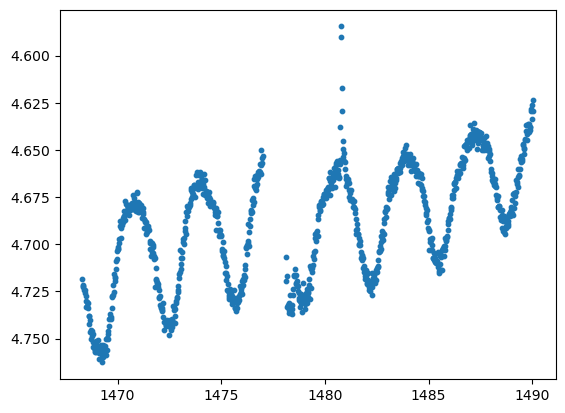

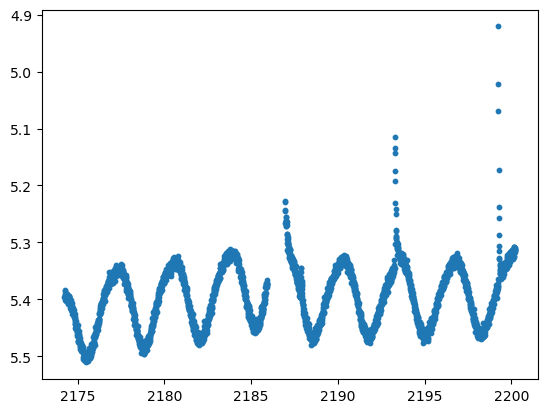

In [34]:
plt.figure()
plt.scatter(timePD2_30, phPD2_30, s=10)
#plt.ylim(330, 420)
plt.gca().invert_yaxis()

plt.figure()
plt.scatter(timePD2_2, phPD2_2, s=10)
#plt.ylim(310, 460)
plt.gca().invert_yaxis()

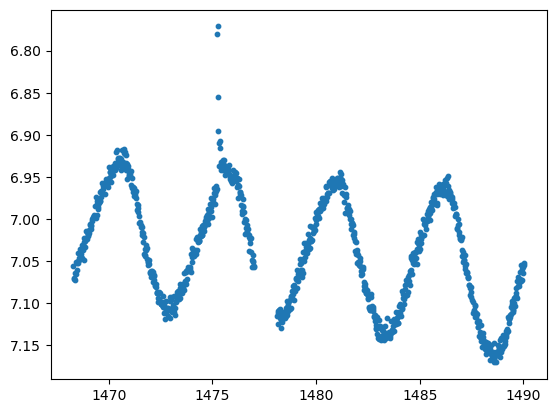

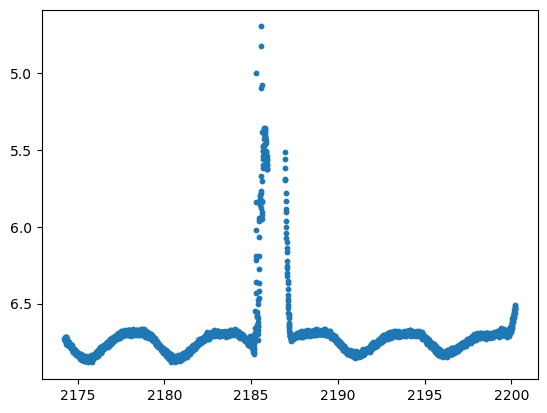

In [35]:
plt.figure()
plt.scatter(timePD3_30, phPD3_30, s=10)
#plt.ylim(103, 120)
plt.gca().invert_yaxis()

plt.figure()
plt.scatter(timePD3_2, phPD3_2, s=10)
#plt.ylim(200, 250)
plt.gca().invert_yaxis()

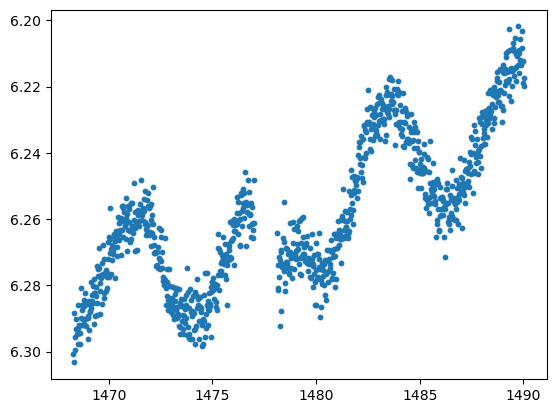

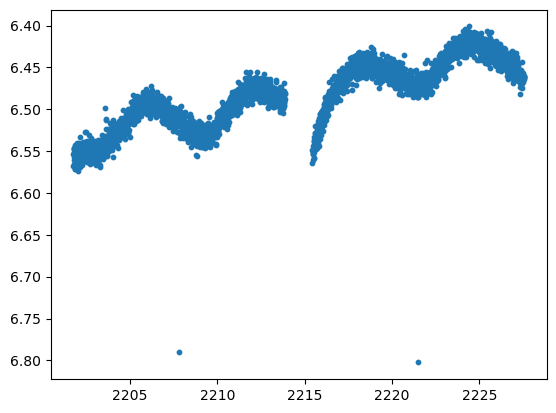

In [36]:
plt.figure()
plt.scatter(timePD4_30, phPD4_30, s=10)
#plt.ylim(145, 148)
plt.gca().invert_yaxis()

plt.figure()
plt.scatter(timePD4_2, phPD4_2, s=10)
#plt.ylim(146, 152)
plt.gca().invert_yaxis()

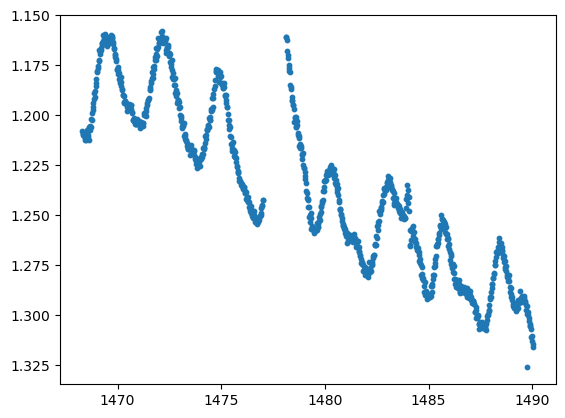

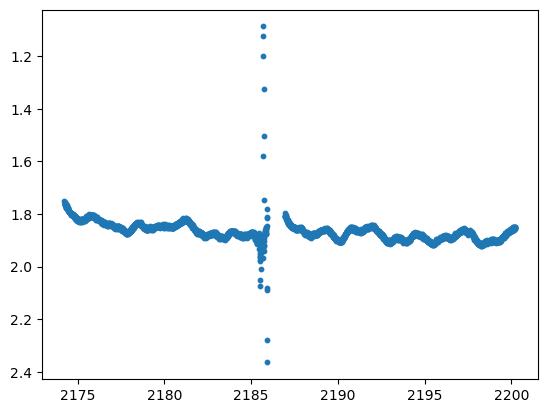

In [37]:
plt.figure()
plt.scatter(timePD5_30, phPD5_30, s=10)
#plt.ylim(825, 850)
plt.gca().invert_yaxis()

plt.figure()
plt.scatter(timePD5_2, phPD5_2, s=10)
#plt.ylim(760, 810)
plt.gca().invert_yaxis()

(2.5, 6.0)

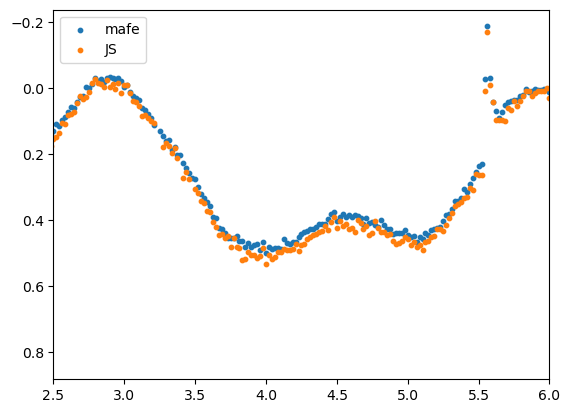

In [38]:
#Comparación del periodo de una estrolla con la fotometría hecha por Javier Serna
import pandas as pd

datosJS = pd.read_csv("TIC 11198070_s_6.csv")
escalaM = phPD1_30.max() - phPD1_30.min()
escalaJS = datosJS["mag"].max() - datosJS["mag"].min()

escaladoM = (phPD1_30-phPD1_30[0])/escalaM

escaladoJS = (datosJS["mag"] - datosJS["mag"][0])/escalaJS
plt.scatter(timePD1_30-min(timePD1_30),escaladoM, label="mafe", s=10)
plt.scatter(datosJS["time"]-min(datosJS["time"]),escaladoJS, label="JS", s=10)
plt.legend()
plt.gca().invert_yaxis()
plt.xlim(2.5, 6)

In [39]:
cond = np.logical_and((timePD1_30-min(timePD1_30)) <= 6, (timePD1_30-min(timePD1_30)) >= 2.5)
print(len(phPD1_30[cond]))

cond = np.logical_and((datosJS["time"]-min(datosJS["time"])) <= 6, (datosJS["time"]-min(datosJS["time"])) >= 2.5)
print(len(datosJS["mag"][cond]))

168
165


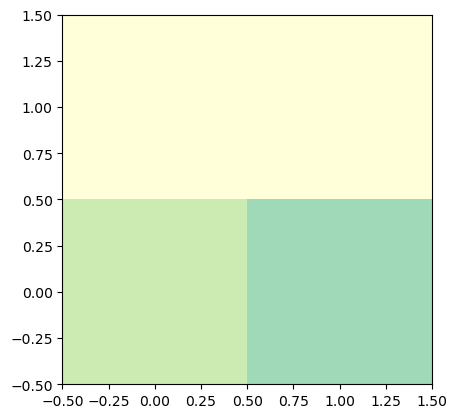

In [101]:
#Intentar el calculo con 2x2 pixeles
new = dataPC1_30['FLUX'][800][4:6 , 5:7]
plt.imshow(new, origin = 'lower', cmap = plt.cm.YlGnBu_r, vmax = np.percentile(nnew, 95), vmin = np.percentile(nnew, 5))

In [41]:
def estrellas_2x2 (data):
    
    n = len(data['FLUX'])
    nc = np.empty(n, dtype = object)
    est = np.zeros(n)

    for i in range(n):
        est[i] = np.sum(data['FLUX'][i][4:6 , 5:7])
    
    return est

In [50]:
stPC1_30_2x2 = estrellas_2x2(dataPC1_30)
phPC1_30_2x2 = stPC1_30_2x2 - skyPC1_30*4

phPC1_30_2x2 = phPC1_30_2x2.tolist()

for i in puntos_1:
    phPC1_30_2x2.pop(i) 
    
phPC1_30_2x2 = -2.5*np.log(np.array(phPC1_30_2x2)) + 25

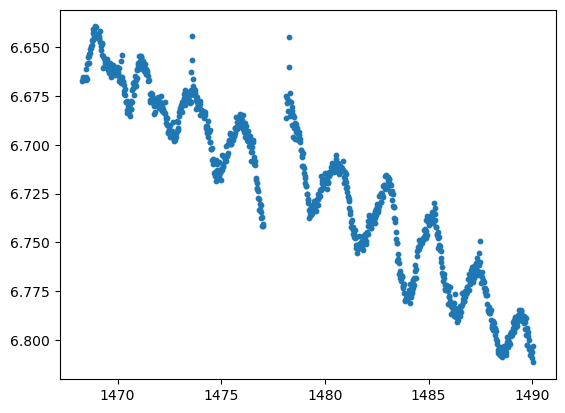

In [51]:
plt.figure()
plt.scatter(timePC1_30, phPC1_30_2x2, s=10)
plt.gca().invert_yaxis()

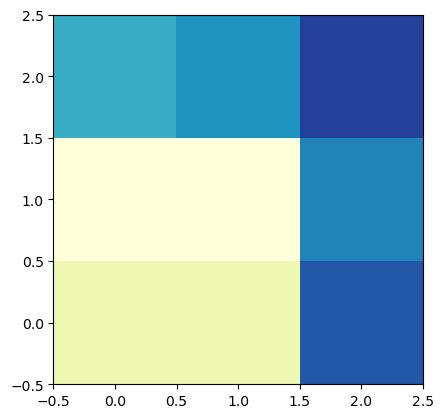

In [52]:
#Intentar el calculo con 3x3 pixeles
new = dataPC1_30['FLUX'][0][4:7 , 5:8]
plt.imshow(new, origin = 'lower', cmap = plt.cm.YlGnBu_r, vmax = np.percentile(nnew, 95), vmin = np.percentile(nnew, 5))

In [53]:
def estrellas_3x3 (data):
    
    n = len(data['FLUX'])
    nc = np.empty(n, dtype = object)
    est = np.zeros(n)

    for i in range(n):
        est[i] = np.sum(data['FLUX'][i][4:7 , 5:8])
    
    return est

In [54]:
stPC1_30_3x3 = estrellas_3x3(dataPC1_30)
phPC1_30_3x3 = stPC1_30_3x3 - skyPC1_30*9

phPC1_30_3x3 = phPC1_30_3x3.tolist()

for i in puntos_1:
    phPC1_30_3x3.pop(i) 
    
phPC1_30_3x3 = -2.5*np.log(np.array(phPC1_30_3x3)) + 25

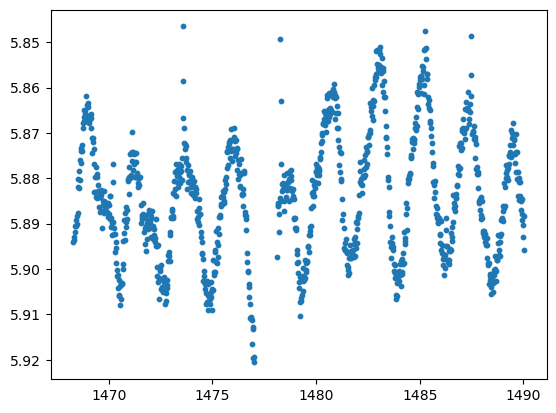

In [55]:
plt.figure()
plt.scatter(timePC1_30, phPC1_30_3x3, s=10)
plt.gca().invert_yaxis()

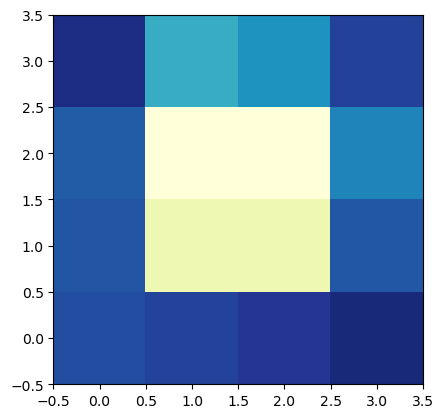

In [57]:
#Intentar el calculo con 4x4 pixeles
new = dataPC1_30['FLUX'][0][3:7 , 4:8]
plt.imshow(new, origin = 'lower', cmap = plt.cm.YlGnBu_r, vmax = np.percentile(nnew, 95), vmin = np.percentile(nnew, 5))

In [58]:
def estrellas_4x4 (data):
    
    n = len(data['FLUX'])
    nc = np.empty(n, dtype = object)
    est = np.zeros(n)

    for i in range(n):
        est[i] = np.sum(data['FLUX'][i][3:7 , 4:8])
    
    return est

In [59]:
stPC1_30_4x4 = estrellas_4x4(dataPC1_30)
phPC1_30_4x4 = stPC1_30_4x4 - skyPC1_30*16

phPC1_30_4x4 = phPC1_30_4x4.tolist()

for i in puntos_1:
    phPC1_30_4x4.pop(i) 
    
phPC1_30_4x4 = -2.5*np.log(np.array(phPC1_30_4x4)) + 25

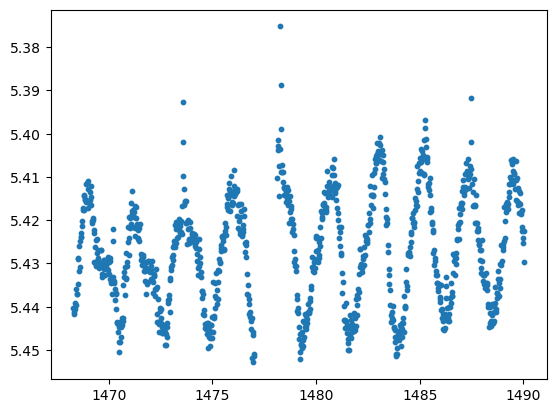

In [60]:
plt.figure()
plt.scatter(timePC1_30, phPC1_30_4x4, s=10)
plt.gca().invert_yaxis()

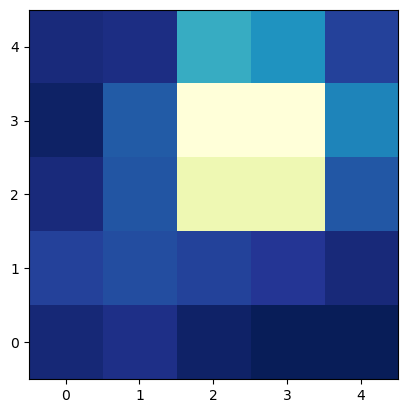

In [71]:
#Intentar el calculo con 5x5 pixeles
new = dataPC1_30['FLUX'][0][2:7 , 3:8]
plt.imshow(new, origin = 'lower', cmap = plt.cm.YlGnBu_r, vmax = np.percentile(nnew, 95), vmin = np.percentile(nnew, 5))

In [72]:
def estrellas_5x5 (data):
    
    n = len(data['FLUX'])
    nc = np.empty(n, dtype = object)
    est = np.zeros(n)

    for i in range(n):
        est[i] = np.sum(data['FLUX'][i][2:7 , 3:8])
    
    return est

In [73]:
stPC1_30_5x5 = estrellas_5x5(dataPC1_30)
phPC1_30_5x5 = stPC1_30_5x5 - skyPC1_30*25

phPC1_30_5x5 = phPC1_30_5x5.tolist()

for i in puntos_1:
    phPC1_30_5x5.pop(i) 
    
phPC1_30_5x5 = -2.5*np.log(np.array(phPC1_30_5x5)) + 25

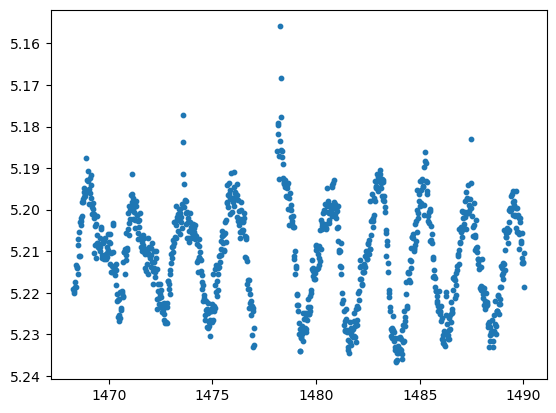

In [82]:
plt.figure()
plt.scatter(timePC1_30, phPC1_30_5x5, s=10)
#plt.ylim(4.3, 4.4)
#plt.xlim(1468, 1472)
plt.gca().invert_yaxis()

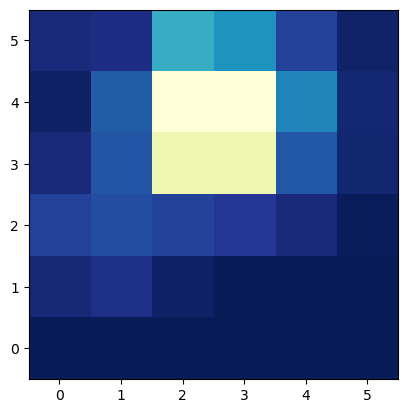

In [76]:
#Intentar el calculo con 6x6 pixeles
new = dataPC1_30['FLUX'][0][1:7 , 3:9]
plt.imshow(new, origin = 'lower', cmap = plt.cm.YlGnBu_r, vmax = np.percentile(nnew, 95), vmin = np.percentile(nnew, 5))

In [70]:
def estrellas_6x6 (data):
    
    n = len(data['FLUX'])
    nc = np.empty(n, dtype = object)
    est = np.zeros(n)

    for i in range(n):
        est[i] = np.sum(data['FLUX'][i][1:7 , 3:9])
    
    return est

In [77]:
stPC1_30_6x6 = estrellas_6x6(dataPC1_30)
phPC1_30_6x6 = stPC1_30_6x6 - skyPC1_30*36

phPC1_30_6x6 = phPC1_30_6x6.tolist()

for i in puntos_1:
    phPC1_30_6x6.pop(i) 
    
phPC1_30_6x6 = -2.5*np.log(np.array(phPC1_30_6x6)) + 25

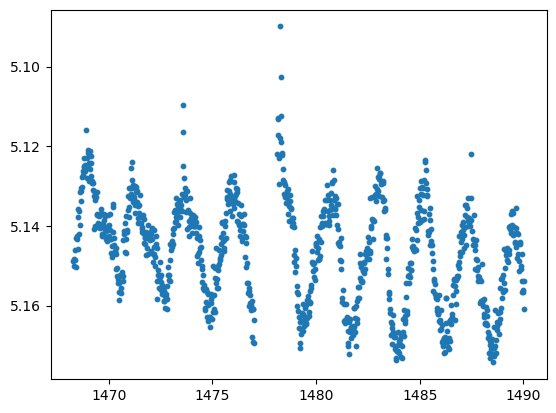

In [83]:
plt.figure()
plt.scatter(timePC1_30, phPC1_30_6x6, s=10)
#plt.xlim(1468, 1472)
plt.gca().invert_yaxis()

In [88]:
ph_resta = np.abs(phPC1_30_6x6 - phPC1_30_2x2)

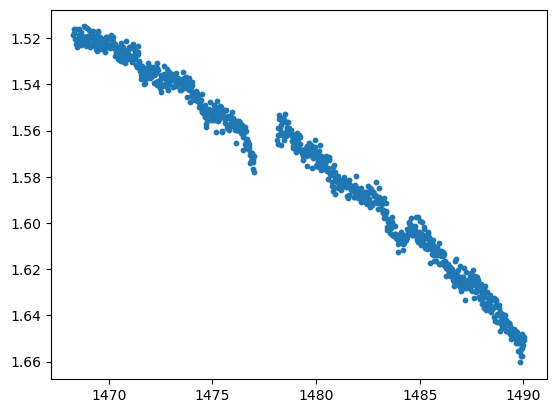

In [89]:
plt.figure()
plt.scatter(timePC1_30, ph_resta, s=10)
#plt.xlim(1468, 1472)
plt.gca().invert_yaxis()

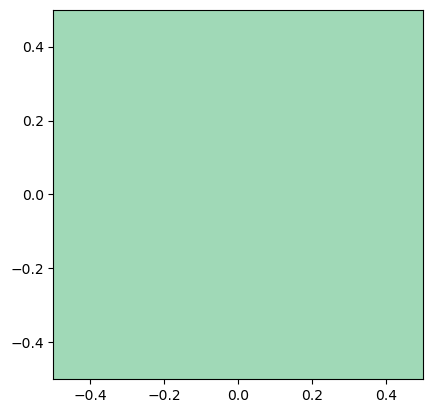

In [106]:
#Intentar el calculo con 2x2 pixeles
new = dataPC1_30['FLUX'][800][4:5 , 6:7]
plt.imshow(new, origin = 'lower', cmap = plt.cm.YlGnBu_r, vmax = np.percentile(nnew, 95), vmin = np.percentile(nnew, 5))

In [108]:
def estrellas_1x1 (data):
    
    n = len(data['FLUX'])
    nc = np.empty(n, dtype = object)
    est = np.zeros(n)

    for i in range(n):
        est[i] = np.sum(data['FLUX'][i][4:5 , 6:7])
    
    return est

In [109]:
stPC1_30_1x1 = estrellas_1x1(dataPC1_30)
phPC1_30_1x1 = stPC1_30_1x1 - skyPC1_30

phPC1_30_1x1 = phPC1_30_1x1.tolist()

for i in puntos_1:
    phPC1_30_1x1.pop(i) 
    
phPC1_30_1x1 = -2.5*np.log(np.array(phPC1_30_1x1)) + 25

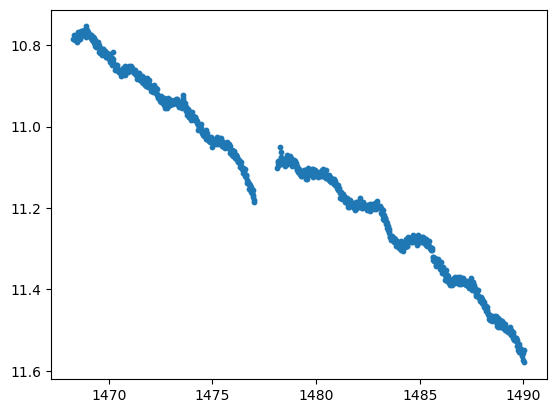

In [110]:
plt.figure()
plt.scatter(timePC1_30, phPC1_30_1x1, s=10)
#plt.xlim(1468, 1472)
plt.gca().invert_yaxis()